Nama: Maylani Kusuma Wardhani  
NIM: 202210370311123  
Kelas: Pemodelan dan Simulasi Data C

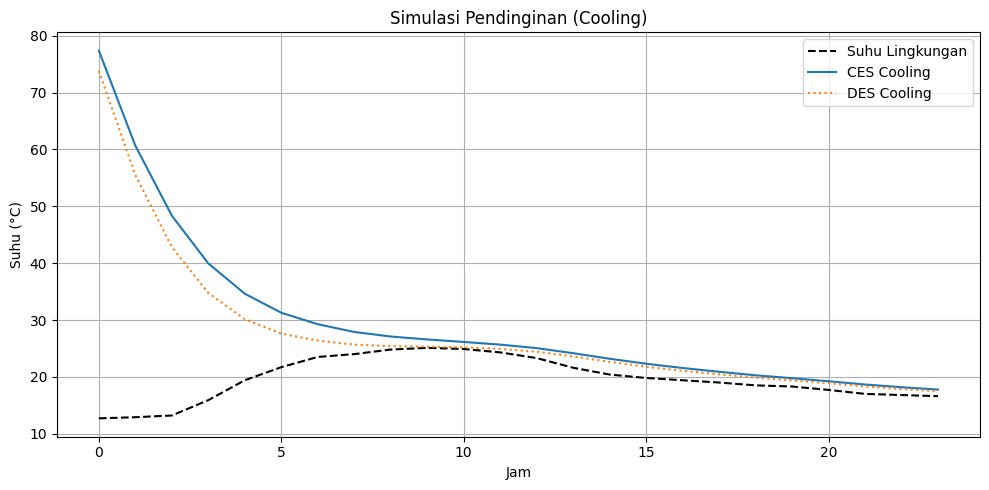

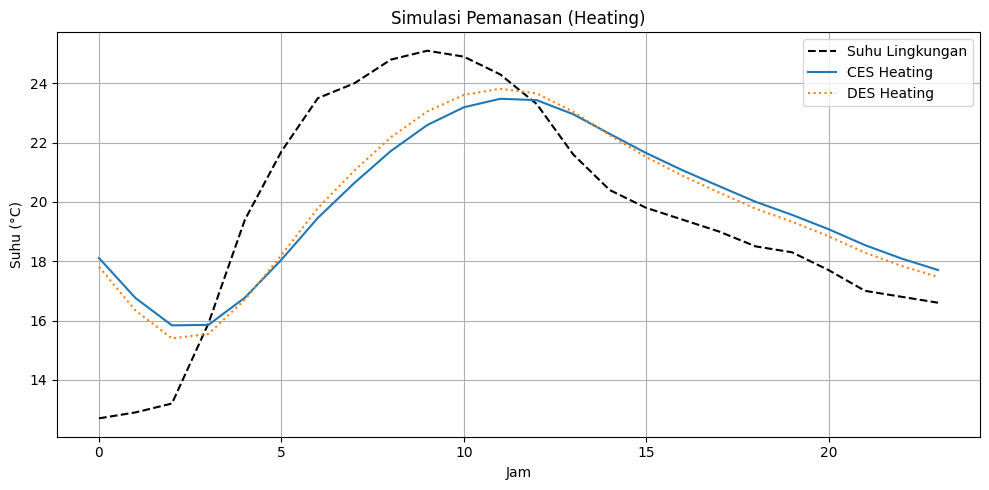

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- Load Dataset Cuaca ---
df = pd.read_csv("/content/Weather_Data_1980_2024(hourly).csv")

time_col = 'time'
temp_col = 'temperature'

df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
df = df.dropna(subset=[time_col, temp_col])
df = df.set_index(time_col).sort_index()

# Ambil suhu lingkungan selama 24 jam pertama
env_data = df[temp_col].iloc[:24].values
time_hours = np.arange(len(env_data))

# --- Persamaan Diferensial ---
def cooling(T, t, k, T_env):
    return -k * (T - T_env)

def heating(T, t, k, T_env):
    return +k * (T_env - T)

def simulate_ces(T0, k, env_temps, mode='cooling'):
    T_result = []
    T_current = T0
    for T_env in env_temps:
        t = np.linspace(0, 1, 10)  # interval waktu per jam
        if mode == 'cooling':
            T = odeint(cooling, T_current, t, args=(k, T_env))
        else:
            T = odeint(heating, T_current, t, args=(k, T_env))
        T_current = T[-1][0]
        T_result.append(T_current)
    return T_result

def simulate_des(T0, k, env_temps, mode='cooling'):
    T_result = []
    T_current = T0
    for T_env in env_temps:
        if mode == 'cooling':
            T_next = T_current - k * (T_current - T_env)
        else:
            T_next = T_current + k * (T_env - T_current)
        T_result.append(T_next)
        T_current = T_next
    return T_result

# --- Simulasi ---
k_val = 0.3
ces_cooling = simulate_ces(100, k_val, env_data, mode='cooling')
ces_heating = simulate_ces(20, k_val, env_data, mode='heating')

des_cooling = simulate_des(100, k_val, env_data, mode='cooling')
des_heating = simulate_des(20, k_val, env_data, mode='heating')

# --- Visualisasi Cooling ---
plt.figure(figsize=(10, 5))
plt.plot(time_hours, env_data, '--k', label='Suhu Lingkungan')
plt.plot(time_hours, ces_cooling, label='CES Cooling')
plt.plot(time_hours, des_cooling, linestyle='dotted', label='DES Cooling')
plt.xlabel("Jam")
plt.ylabel("Suhu (°C)")
plt.title("Simulasi Pendinginan (Cooling)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Visualisasi Heating ---
plt.figure(figsize=(10, 5))
plt.plot(time_hours, env_data, '--k', label='Suhu Lingkungan')
plt.plot(time_hours, ces_heating, label='CES Heating')
plt.plot(time_hours, des_heating, linestyle='dotted', label='DES Heating')
plt.xlabel("Jam")
plt.ylabel("Suhu (°C)")
plt.title("Simulasi Pemanasan (Heating)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


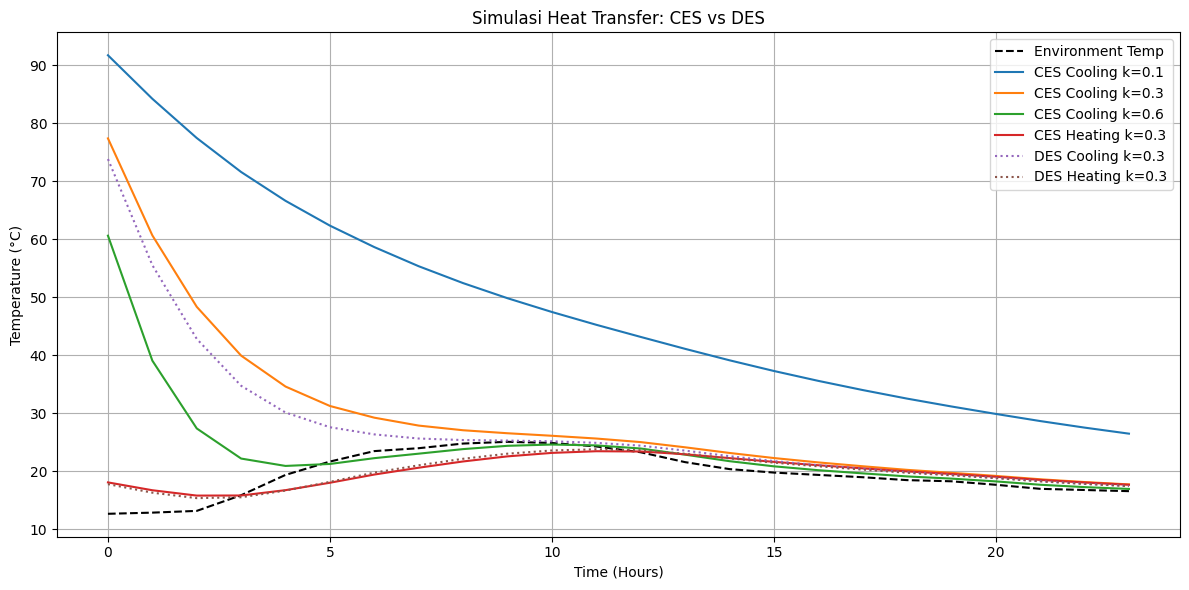

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- Load Dataset Cuaca ---
df = pd.read_csv("/content/Weather_Data_1980_2024(hourly).csv")

# Asumsikan ada kolom "time" dan "temperature"
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.dropna(subset=['time'])
df = df.set_index('time')
df = df.sort_index()

# Ambil suhu 1 hari sebagai data lingkungan
env_data = df['temperature'].dropna().iloc[:24].values  # suhu lingkungan tiap jam
time_hours = np.arange(len(env_data))  # waktu diskrit (jam)

# --- Persamaan Diferensial (CES) ---
def cooling(T, t, k, T_env):
    return -k * (T - T_env)

def heating(T, t, k, T_env):
    return +k * (T_env - T)

# Simulasi suhu selama 24 jam
def simulate_ces(T0, k, env_temps, mode='cooling'):
    T_result = []
    T_current = T0

    for i in range(len(env_temps)):
        T_env = env_temps[i]
        t = np.linspace(0, 1, 10)  # 1 jam
        if mode == 'cooling':
            T = odeint(cooling, T_current, t, args=(k, T_env))
        else:
            T = odeint(heating, T_current, t, args=(k, T_env))
        T_current = T[-1][0]
        T_result.append(T_current)

    return T_result

# --- Simulasi CES dengan variasi k ---
T0 = 100  # suhu awal benda (misalnya derajat C)
k_values = [0.1, 0.3, 0.6]
ces_results = {}

for k in k_values:
    ces_results[f'CES Cooling k={k}'] = simulate_ces(T0, k, env_data, mode='cooling')

# --- Simulasi CES untuk pemanasan ---
ces_results['CES Heating k=0.3'] = simulate_ces(T0=20, k=0.3, env_temps=env_data, mode='heating')

# --- DES (Discrete Event Simulation) ---
def simulate_des(T0, k, env_temps, mode='cooling'):
    T_result = []
    T_current = T0
    for T_env in env_temps:
        if mode == 'cooling':
            T_next = T_current - k * (T_current - T_env)
        else:
            T_next = T_current + k * (T_env - T_current)
        T_result.append(T_next)
        T_current = T_next
    return T_result

# Simulasi DES untuk pendinginan dan pemanasan
des_results = {
    'DES Cooling k=0.3': simulate_des(100, 0.3, env_data, mode='cooling'),
    'DES Heating k=0.3': simulate_des(20, 0.3, env_data, mode='heating')
}

# --- Plot semua hasil ---
plt.figure(figsize=(12, 6))

# Plot data lingkungan
plt.plot(time_hours, env_data, label='Environment Temp', color='black', linestyle='--')

# CES
for label, data in ces_results.items():
    plt.plot(time_hours, data, label=label)

# DES
for label, data in des_results.items():
    plt.plot(time_hours, data, label=label, linestyle='dotted')

plt.xlabel("Time (Hours)")
plt.ylabel("Temperature (°C)")
plt.title("Simulasi Heat Transfer: CES vs DES")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
